<a href="https://colab.research.google.com/github/weiglszonja/memo-workshop/blob/master/memo_python_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEMO Workshop

## Introduction to data analysis with Python
![alt text](https://cdn.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_1064/https://www.easternenterprise.com/wp-content/uploads/2019/06/MACHINE-LEARNING.jpg)

# Analyzing the UCI Heart disease dataset
---
[Dataset information](https://www.kaggle.com/ronitf/heart-disease-uci/data#)

Feature information:
*   age: age in years
*   sex: sex (1 = male; 0 = female)
*   cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
*   trestbps: resting blood pressure (in mm Hg on admission to the hospital)
*   chol: serum cholestoral in mg/dl
*   fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   restecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy)
*   thalach: maximum heart rate achieved
*   exang: exercise induced angina (1 = yes; 0 = no)
*   oldpeak = ST depression induced by exercise relative to rest
*   slope: the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
*   ca = number of major vessels (0-3) colored by flourosopy
*   thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
*   target (maybe THE most important feature): 0 = disease, 1 = no disease


# Import the packages

## Mount your Drive to VM



> Authorize and copy the code to the field below 



In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
os.listdir('/gdrive')

['.shortcut-targets-by-id', 'My Drive', '.Trash']

## Import the packages 




In [0]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
# for saving pretty plots with bigger labelsizes
# not needed now, you can leave it as it is

# from matplotlib import pylab

# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (12, 6),
#           'axes.labelsize': 'x-large',
#           'axes.titlesize': 'x-large',
#           'xtick.labelsize': 'x-large',
#           'ytick.labelsize': 'x-large'}

# pylab.rcParams.update(params)

In [0]:
# Change the data path 'My Drive/CRNL - MEMO/workshop/data/' to your path!
root_path = os.path.join('/gdrive', 'My Drive')
data_path = os.path.join(root_path, 'CRNL - MEMO', 'workshop', 'data')
os.listdir(data_path)

['heart.csv']

# Read the dataset

In [0]:
heart = pd.read_csv(os.path.join(data_path, 'heart.csv'))
# by default displays the first 5 row from df
# to show the first 20 rows you can write df.head(20)
heart.head()

# to show the last rows similalry to .head() you can use
# df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Discover the dataset

In [0]:
# returns number of rows, number of columns
heart.shape

(303, 14)

In [0]:
# .info() shows data type infomation for each column in df
# heart.info()
# remove .loc to see more 
heart.describe().loc[['count','mean', 'std', 'min', 'max']]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Cleaning the data

### Dropping columns

In [0]:
columns_to_drop = ['oldpeak', 'slope']
heart = heart.drop(columns_to_drop, axis=1)

# inplace is less preferred (changes the object directly)
# heart.drop(to_drop, inplace=True, axis=1)

### Removing missing values

In [0]:
# this would return rows from df where there is at least one missing value
heart[heart.isna().any(axis=1)]
# for alternative you can use
# heart.isnull().sum()

# if there would be NaN values that we would want to drop
# this would drop every row if there is at least one missing value
# df = df.dropna(how='any',axis=0) 
# to remove only those rows that belong to a column "B"
# df[~df['B'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### The grouping operation

#### Read the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
##### Other [source](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)


In [0]:
# group over column (or list of columns) and make an operation
# .mean(), .median(), .std(), .var(), .sum(), .count(), .first(), .last()
heart.groupby('target').mean()

# with apply() we can execute more operations on the group
# heart.groupby('target').apply(lambda x: x.mean())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [0]:
target_mapping = {0: 'No disease', 1: 'Disease'}
for name, group in heart.groupby('target'):
    print(f'{target_mapping[name]} group data: ')
    print(group.head())
    print('*'*85)

No disease group data: 
     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
165   67    1   0       160   286    0  ...      1      1.5      1   3     2       0
166   67    1   0       120   229    0  ...      1      2.6      1   2     3       0
167   62    0   0       140   268    0  ...      0      3.6      0   2     2       0
168   63    1   0       130   254    0  ...      0      1.4      1   1     3       0
169   53    1   0       140   203    1  ...      1      3.1      0   0     3       0

[5 rows x 14 columns]
*************************************************************************************
Disease group data: 
   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   

In [0]:
# do different operation on columns
target_grouped = heart.groupby('target')
target_grouped.agg({'cp': np.var,
                    'restecg': lambda x: np.std(x, ddof=1),
                    'exang': np.max})

,cp,restecg,exang
target,,,
0,0.820692,0.541321,1
1,0.906726,0.504818,1


In [0]:
# describe groups for selected column
heart.groupby('target')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0
1,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0


### Renaming columns

In [0]:
new_column_names = {'old_name1': 'new_name1',
                    'old_name2': 'new_name2'}
heart = heart.rename(new_column_names, axis=1)

# inplace is less preferred but can be used
# heart.rename(columns=new_names, inplace=True)

## Filtering the dataset


>  Find more about loc, iloc [here](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)


In [0]:
# filtering based on column value(s)
heart[(heart['sex'] == 1) & (heart['chol'] > 120)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [0]:
# filtering based on index
# filter rows then select column(s)
heart.loc[heart['age'] > 70, ['chol', 'age']] 

# assign new value
#heart.loc[heart['age'] > 23, 'chol'] = 33

,chol,age
25,302,71
60,265,71
129,269,74
144,197,76
151,149,71
238,304,77


# Visualization

1    165
0    138
Name: target, dtype: int64


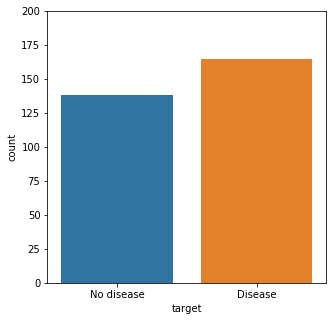

In [0]:
print(heart['target'].value_counts())
# same as 
# heart.target.value_counts()

plt.figure(figsize=(5,5))
sns.countplot(heart['target'])
plt.xticks(ticks=[0, 1], labels=['No disease', 'Disease'])
plt.ylim([0, 200])
plt.show()

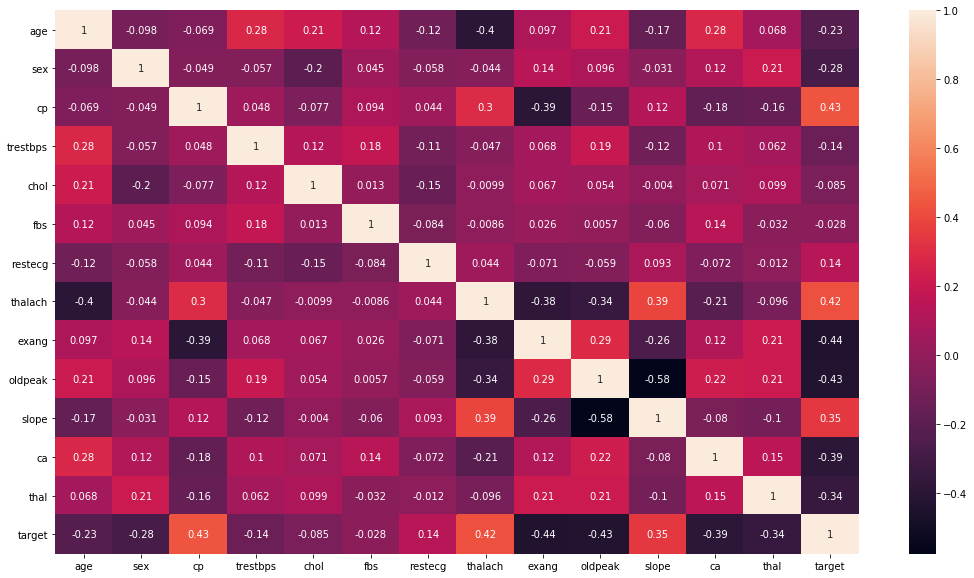

In [0]:
corr = heart.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
# for saving a plot with given dpi (you have to download it)
# plt.savefig(fname='corr.png', dpi=200, transparent=True)
plt.show()

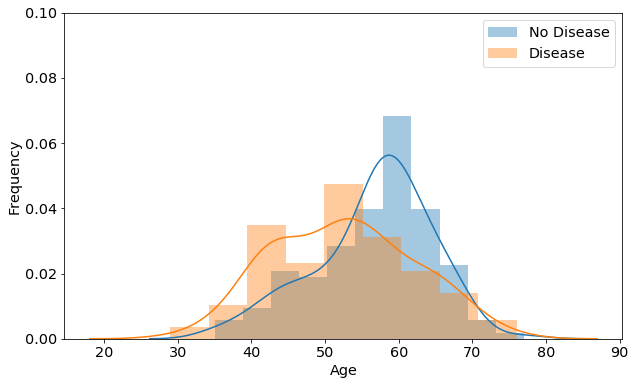

In [0]:
plt.figure(figsize=(10, 6))
sns.distplot(heart.age[heart['target'] == 0], label='No Disease')
sns.distplot(heart.age[heart['target'] == 1], label='Disease')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.ylim([0, 0.1])
#plt.savefig(fname='dist_age_disease.png', dpi=200, transparent=True)
plt.show()

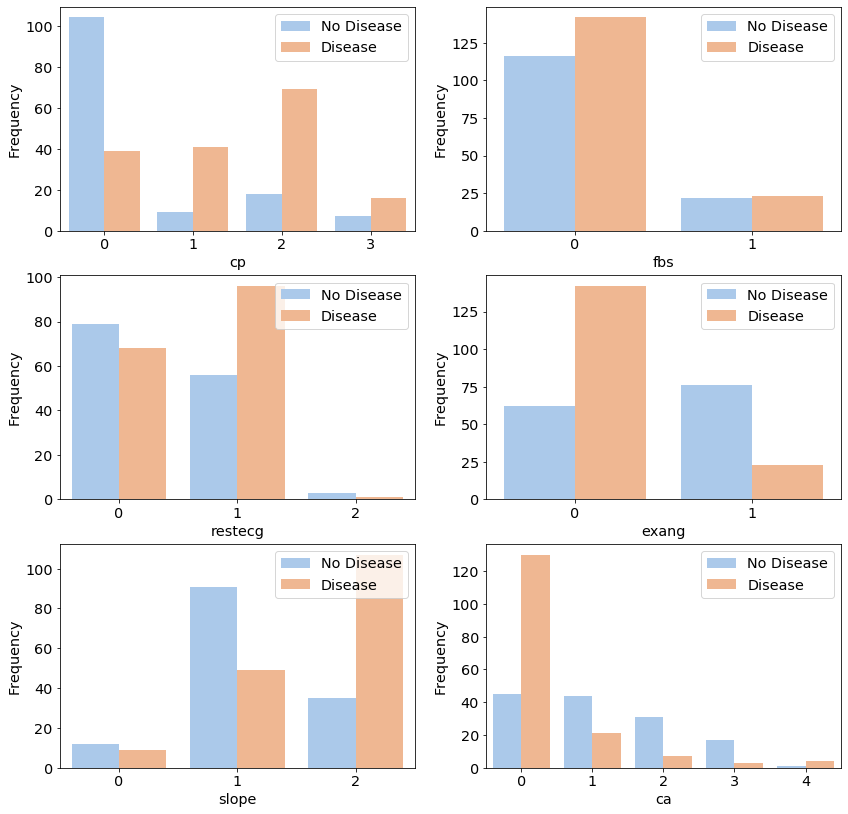

In [0]:
# there are many palettes for seaborn e.g. "colorblind"
features = ['cp', 'fbs', 'restecg','exang', 'slope', 'ca']

fig, axes = plt.subplots(3, 2, figsize=(14,14))
for i, axi in enumerate(axes.flat):
    sns.countplot(x=features[i],
                  hue='target',
                  data=heart,
                  palette='pastel',
                  ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["No Disease", "Disease"])

#plt.savefig(fname='dist_features.png', dpi=200, transparent=True)
plt.show()

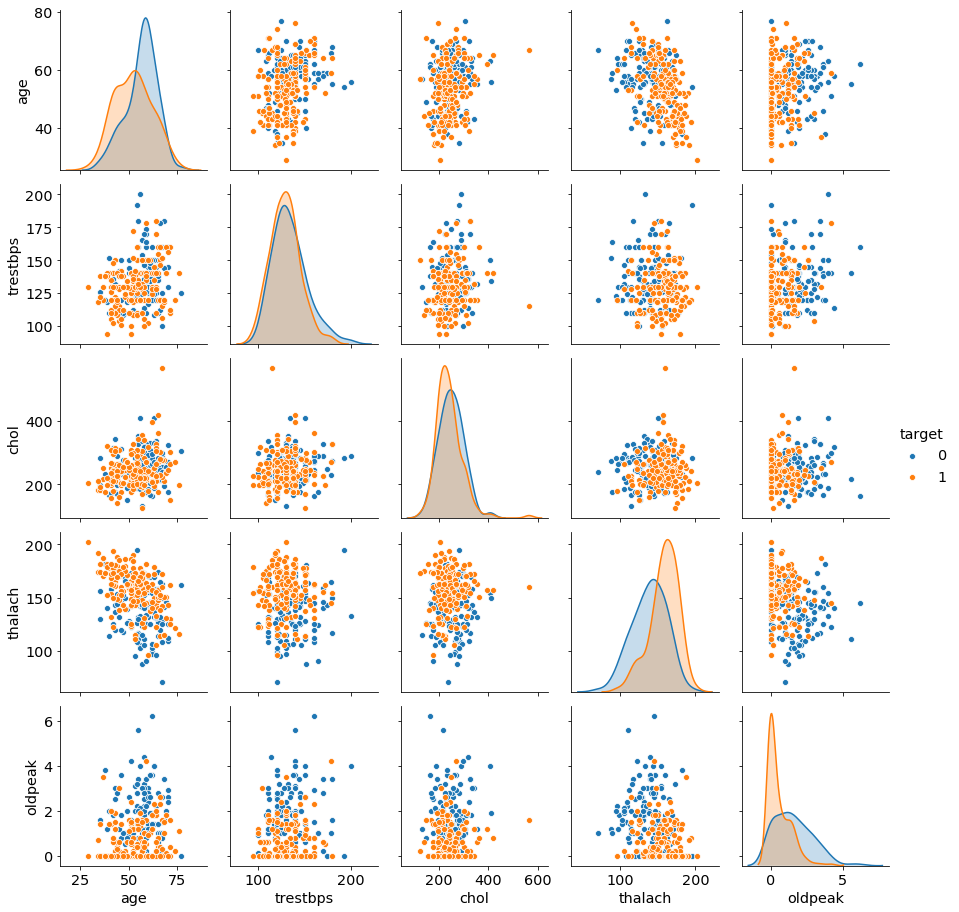

In [0]:
sns.pairplot(heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']],
             hue="target",
             height=2.5);
#plt.savefig(fname='pairplot_features.png', dpi=200, transparent=True)

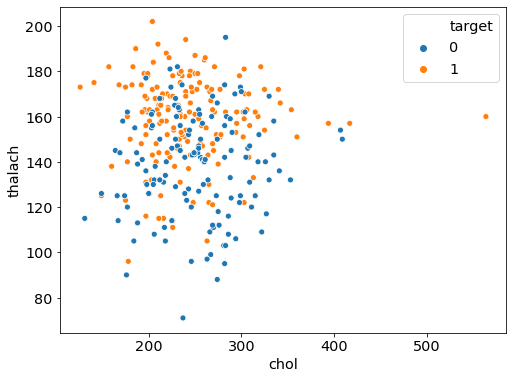

In [0]:
# scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol', y='thalach', data=heart, hue='target')
plt.show()

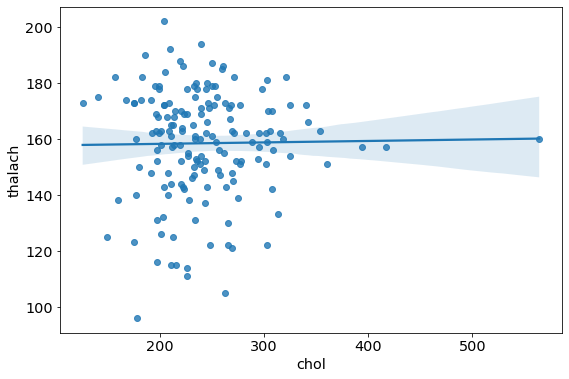

In [0]:
# scatterplots with regression line
x = heart[heart['target'] == 1]['chol']
y = heart[heart['target'] == 1]['thalach']
plt.figure(figsize=(9,6))
sns.regplot(x, y);
plt.show()

<Figure size 720x432 with 0 Axes>

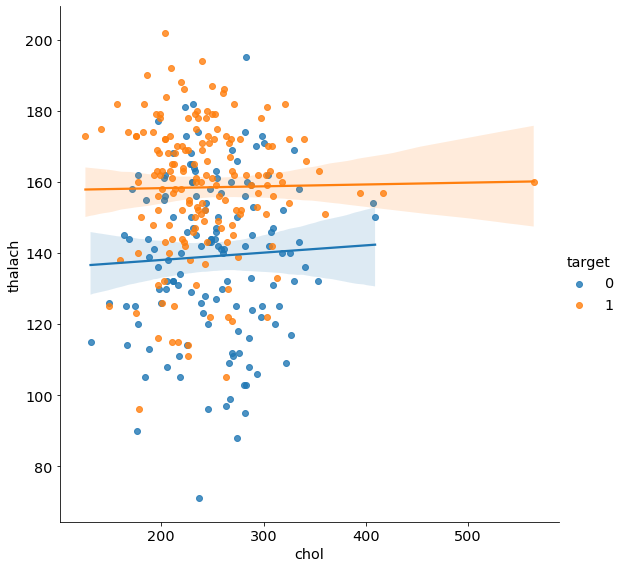

In [0]:
plt.figure(figsize=(10,6))
sns.lmplot(x='chol', y='thalach', data=heart, hue='target', height=8)
plt.show()

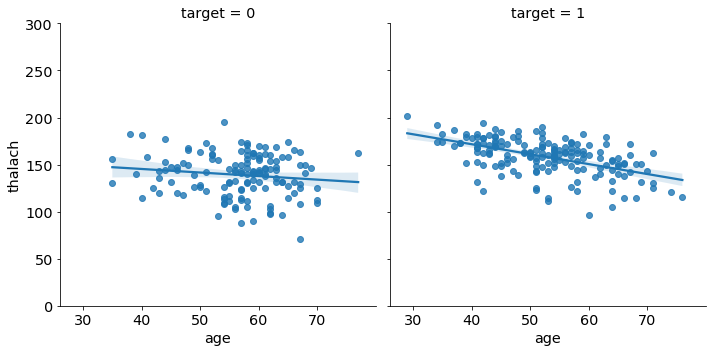

In [0]:
sns.lmplot(x="age", y="thalach", col="target", data=heart)
plt.ylim([0, 300])
plt.show()

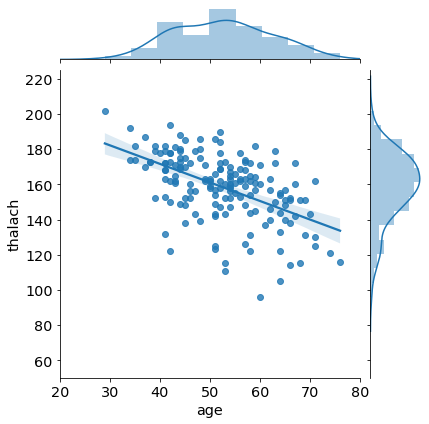

In [0]:
x = heart[heart['target'] == 1]['age']
y = heart[heart['target'] == 1]['thalach']
sns.jointplot(x=x, y=y, data=heart, kind="reg");
plt.xlim([20, 80])
plt.ylim([50, 225])
plt.show()

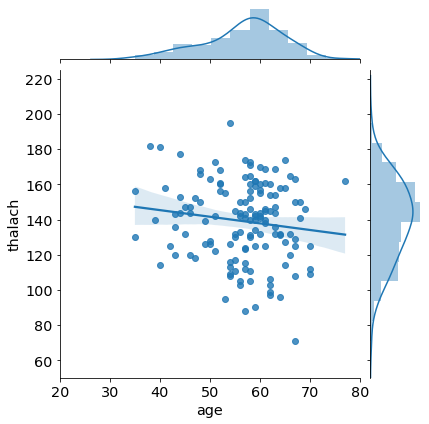

In [0]:
x = heart[heart['target'] == 0]['age']
y = heart[heart['target'] == 0]['thalach']
sns.jointplot(x=x, y=y, data=heart, kind="reg");
plt.xlim([20, 80])
plt.ylim([50, 225])
plt.show()